In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("billionaires-analysis.csv")

In [3]:
df.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


In [4]:
df.tail(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2745,Xu Jin,$1 B,China,wine,2674,56.0,Food & Beverage
2746,Vadim Yakunin,$1 B,Russia,pharmacy,2674,58.0,Healthcare
2747,Mark Haoyong Yang,$1 B,China,e-commerce,2674,46.0,Technology
2748,Yao Hsiao Tung,$1 B,Singapore,Manufacturing,2674,81.0,Manufacturing
2749,Yu De-Chao,$1 B,United States,pharmaceuticals,2674,57.0,Healthcare
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [6]:
df.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [7]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [8]:
df.shape

(2755, 7)

In [9]:
df["NetWorth"] = df["NetWorth"].str.strip("$")
df["NetWorth"] = df["NetWorth"].str.strip("B")
df["NetWorth"] = df["NetWorth"].astype(float)

## Top Five billionaires

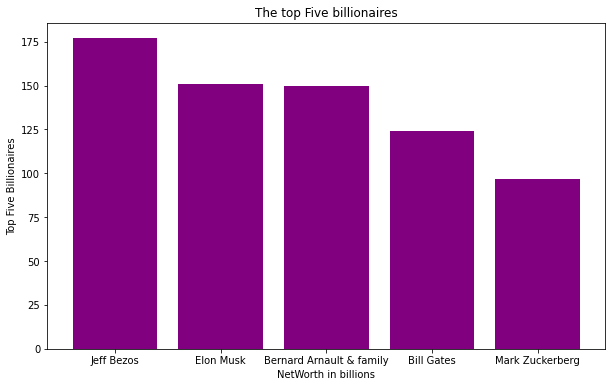

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(df['Name'].head(5), df['NetWorth'].head(5), color='purple')
plt.title('The top Five billionaires')
plt.xlabel('NetWorth in billions')
plt.ylabel('Top Five Billionaires')
plt.show()

## Top 5 industries with the most Billionaires

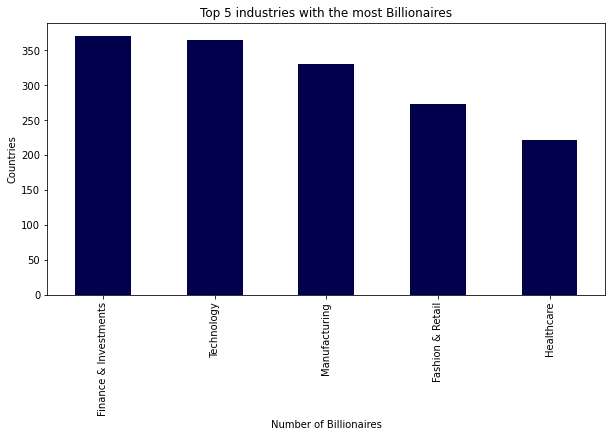

In [11]:
df['Industry'].value_counts()[:5].plot(kind='bar', cmap='seismic', figsize=(10,5))
plt.title('Top 5 industries with the most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Countries')
plt.show()

## Top 5 countries with the most billionaires

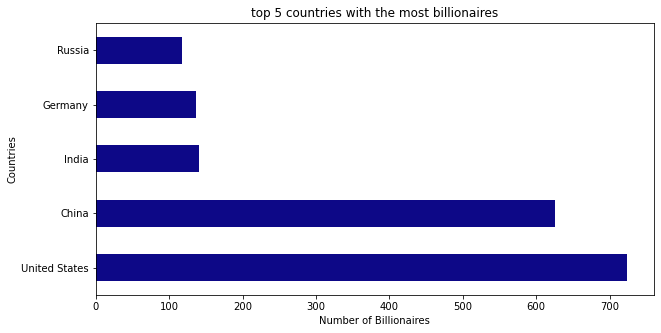

In [12]:
df['Country'].value_counts()[:5].plot(kind='barh', cmap='plasma', figsize=(10,5))
plt.title('top 5 countries with the most billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Countries')
plt.show()

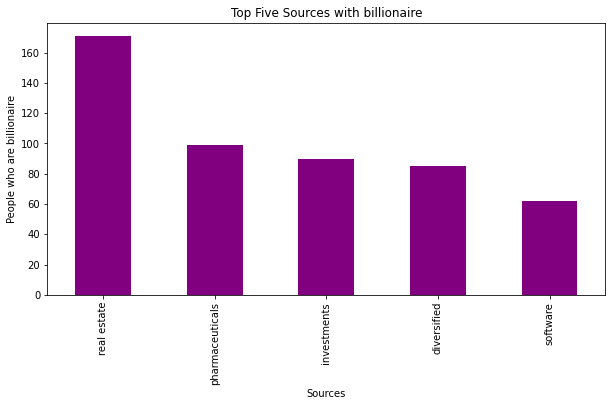

In [13]:
plt.subplots(1, 1, figsize=(10, 5))
df['Source'].value_counts()[:5].plot(kind='bar', color = 'purple')
plt.xlabel('Sources')
plt.ylabel('People who are billionaire')
plt.title('Top Five Sources with billionaire')
plt.show()

In [14]:
df.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20)

Source
real estate        686.1
diversified        378.2
investments        339.2
pharmaceuticals    335.3
software           275.8
hedge funds        240.1
Amazon             230.0
e-commerce         225.5
Walmart            220.2
Google             216.4
Microsoft          197.7
retail             159.9
Tesla, SpaceX      151.0
LVMH               150.0
Facebook           142.4
mining             141.6
telecom            126.4
private equity     124.0
chemicals          106.4
banking            106.4
Name: NetWorth, dtype: float64

## Billioinaires having more than one company

In [15]:

df1 = df[df['Source'].str.contains(",") | df['Source'].str.contains('diver')]
df1.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified
12,Zhong Shanshan,68.9,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified
28,Masayoshi Son,45.4,Japan,"internet, telecom",29,63.0,Telecom


## Number Of Billionaires in top five country

In [16]:
df2 = df.drop_duplicates().groupby('Country').count().copy()

df2 = df2['Name'].copy()

df2 = df2.sort_values(ascending=False)

df2 = pd.DataFrame(df1)

df2.rename(columns = {'Name':'Billionaires'}, inplace = True)
df2.head()

,Billionaires,NetWorth,Country,Source,Rank,Age,Industry
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified
12,Zhong Shanshan,68.9,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified
28,Masayoshi Son,45.4,Japan,"internet, telecom",29,63.0,Telecom


## Distribution by age with respect to net worth

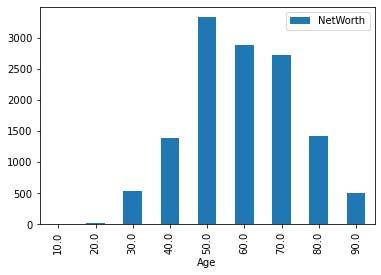

In [26]:
age_money = df.groupby(df['Age'] // 10*10 )['NetWorth'].sum().to_frame().sort_values(by=['Age'])
age_money.plot(kind="bar")

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
df_source = " ".join(df['Source'])

(-0.5, 9999.5, 7999.5, -0.5)

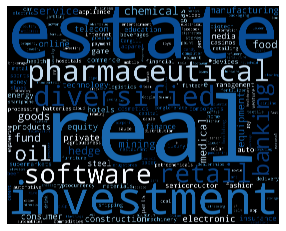

In [19]:
wordcloud = WordCloud(width = 10000, height = 8000, random_state=1, background_color='black', colormap='Blues', collocations=False, stopwords = STOPWORDS).generate(df_source)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')